# Class definitions

In [35]:
import numpy as np
import matplotlib.pyplot as plt


class PlanarRobot:
    def __init__(self, joint_angles, link_lengths, color="red", label=None):
        """
        Initialize the robot with given joint angles, link lengths, and color.
        """
        assert len(joint_angles) == len(
            link_lengths
        ), "Number of joint angles and link lengths must match"

        self.joint_angles = joint_angles  # List of joint angles (radians)
        self.link_lengths = link_lengths  # List of link lengths
        self.color = color  # Color of the robot
        self.label = label
        self.points = self.forward_kinematics()

    def dh_transform(self, a, theta):
        """
        Calculate the 2D transformation matrix for a given joint.
        """
        return np.array(
            [
                [np.cos(theta), -np.sin(theta), a * np.cos(theta)],
                [np.sin(theta), np.cos(theta), a * np.sin(theta)],
                [0, 0, 1],
            ]
        )

    def forward_kinematics(self):
        """
        Perform forward kinematics to compute the (x, y) position of each joint.
        """
        n = len(self.joint_angles)  # Number of joints/links
        T = np.eye(3)  # Start with an identity matrix for the base frame

        # Store each link's end point for plotting
        points = [[0, 0]]  # Start at the origin

        # Compute the transformation for each joint
        for i in range(n):
            Ti = self.dh_transform(self.link_lengths[i], self.joint_angles[i])
            T = T @ Ti  # Update the transformation matrix
            # Get the (x, y) position of the end-effector after this joint
            x, y = T[0, 2], T[1, 2]
            points.append([x, y])

        return np.array(points)

    def get_max_reach(self):
        """
        Calculate the maximum reach of the robot (i.e., the total length of the robot's arm).
        """
        return sum(self.link_lengths)

    def plot(self):
        """
        Plot the robot's configuration based on forward kinematics.
        """
        # Get the (x, y) positions of the joints

        # Extract x and y coordinates
        x = self.points[:, 0]
        y = self.points[:, 1]

        # Plot the robot as a series of lines between the points
        plt.plot(
            x,
            y,
            "-o",
            color=self.color,
            markersize=8,
            linewidth=4,
            label=self.label if self.label else None,
        )


# Create a function to handle plotting multiple robots together
def plot_multiple_planar_robots(*robots):
    """
    Function to plot multiple robots on the same graph.
    Each robot is an instance of the PlanarRobot class.
    """
    max_reach = 0

    # Plot each robot by calling its plot function and compute max reach
    for robot in robots:
        robot.plot()
        max_reach = max(max_reach, robot.get_max_reach())  # Update max reach if needed

    # Add Cartesian coordinate axes (X and Y axes)
    plt.axhline(0, color="black", linewidth=1)  # X-axis
    plt.axvline(0, color="black", linewidth=1)  # Y-axis

    # Set plot limits dynamically based on the maximum reach of the robots
    limit = max_reach * 1  # Add 20% margin for better visualization
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)
    plt.xticks([])
    plt.yticks([])
    plt.gca().set_aspect("equal", adjustable="box")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")

## Punctiform robot

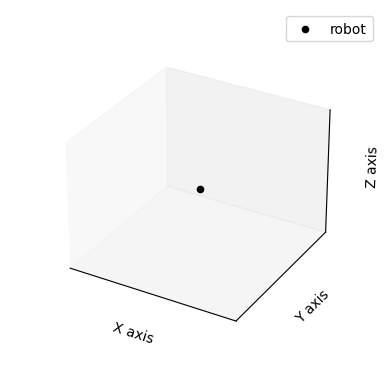

In [14]:
import matplotlib.pyplot as plt

# Create a 3D plot with axis labels and a legend
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Coordinates of the dot
x, y, z = 0, 0, 0

# Plot the black dot
sc = ax.scatter(x, y, z, color="black", label="robot")

# Add axis labels
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# Add a legend in the upper right corner
ax.legend(loc="upper right")

# Set limits for better visualization
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_box_aspect(aspect=None, zoom=0.8)  # zoom out to show the z label
# Show the plot
plt.show()

## Roomba example with symmetry

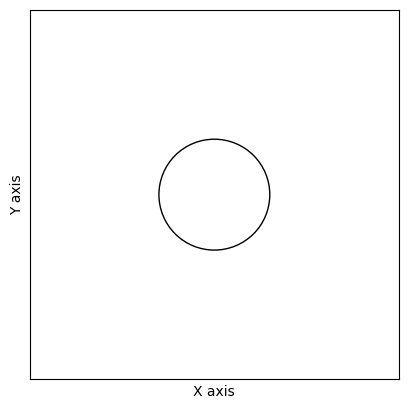

In [41]:
import matplotlib.pyplot as plt

# Create a 2D plot with a circle
fig, ax = plt.subplots()

# Define the center and radius of the circle
circle = plt.Circle((0, 0), 0.3, color="black", fill=False)

# Add the circle to the plot
ax.add_artist(circle)

# Set equal scaling to maintain the aspect ratio of the circle
ax.set_aspect("equal")

# Set limits for the plot
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

# Remove grid and axis ticks
ax.grid(False)

ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")

ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

## Roomba example without symmetry

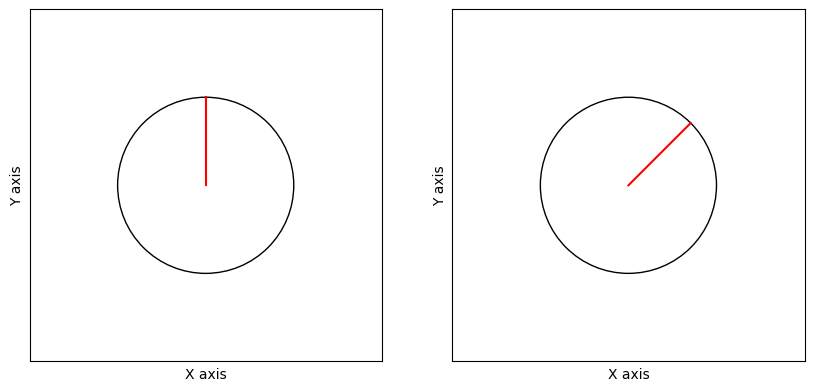

In [48]:
import matplotlib.pyplot as plt  # Create a 2D plot with a circle
import numpy as np

# Create a 2D plot with two circles, ticks, and axis labels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First circle (left plot)
circle1 = plt.Circle((0, 0), 0.5, fill=False)
ax1.add_artist(circle1)

# Tick inside the first circle
ax1.plot([0, 0], [0.5, 0], color="red")  # vertical tick

# Set equal scaling and limits for the first plot
ax1.set_aspect("equal")
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])

# Add axis labels to the first plot
ax1.set_xlabel("X axis")
ax1.set_ylabel("Y axis")

# Remove grid and axis ticks for the first plot
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

# Second circle (right plot) with rotation
circle2 = plt.Circle((0, 0), 0.5, fill=False)
ax2.add_artist(circle2)

# Create a rotated tick for the second circle (rotation of 45 degrees)
rotation_angle = np.radians(45)
tick_length = 0.5
x_rotated = tick_length * np.cos(rotation_angle)
y_rotated = tick_length * np.sin(rotation_angle)

# Plot the rotated tick
ax2.plot([0, x_rotated], [0, y_rotated], color="red")

# Set equal scaling and limits for the second plot
ax2.set_aspect("equal")
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])

# Add axis labels to the second plot
ax2.set_xlabel("X axis")
ax2.set_ylabel("Y axis")

# Remove grid and axis ticks for the second plot
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])

# Show the plot
plt.show()

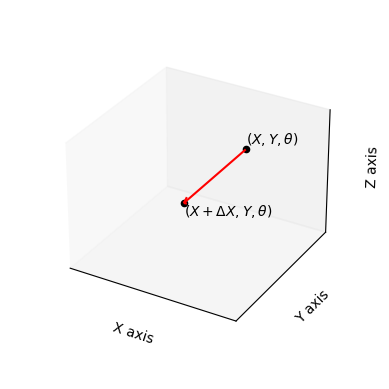

In [64]:
import matplotlib.pyplot as plt

# Create a 3D plot for the dot's movement
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Coordinates of the initial and final positions of the dot
x_start, y_start, z_start = 3, 6, 0
x_end, y_end, z_end = 3, 2, 0  # Moving along the x-direction

# Plot the initial and final points
ax.scatter(x_start, y_start, z_start, color="black", label="Start Point")
ax.scatter(x_end, y_end, z_end, color="black", label="End Point")

# Add labels for the points
ax.text(x_start, y_start, z_start + 0.1, r"$(X, Y, \theta)$", color="black")
ax.text(x_end, y_end, z_end - 0.2, r"$(X + \Delta X, Y, \theta)$", color="black")

# Plot an arrow to represent the trajectory along the x-direction
ax.quiver(
    x_start,
    y_start,
    z_start,
    x_end - x_start,
    y_end - y_start,
    z_end - z_start,
    color="red",
    arrow_length_ratio=0.05,
)

# Set equal scaling for better visualization
ax.set_box_aspect([1, 1, 1])  # Aspect ratio is 1:1:1

# Set labels for the axes
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# Set limits for better visualization
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([-1, 1])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Remove grid for a cleaner look
ax.grid(False)

ax.set_box_aspect(aspect=None, zoom=0.8)  # zoom out to show the z label
# Show the plot
plt.show()

## N Joints manipulator

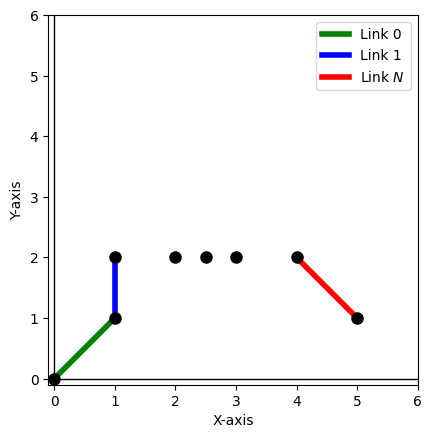

In [144]:
import matplotlib.pyplot as plt

# Plot settings
plt.axhline(0, color="black", linewidth=1)  # X-axis
plt.axvline(0, color="black", linewidth=1)  # Y-axis
limit = 6
plt.xlim(-0.1, limit)
plt.ylim(-0.1, limit)
plt.gca().set_aspect("equal", adjustable="box")


plt.plot([0, 1], [0, 1], color="green", linewidth=4, label="Link 0")
plt.plot([1, 1], [1, 2], color="blue", linewidth=4, label="Link 1")
plt.plot([4, 5], [2, 1], color="red", linewidth=4, label=r"Link $N$")

plt.plot(0, 0, "-o", color="black", markersize=8, linewidth=4)
plt.plot(1, 1, "-o", color="black", markersize=8, linewidth=4)
plt.plot(1, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(2, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(2.5, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(3, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(4, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(5, 1, "-o", color="black", markersize=8, linewidth=4)


# Add a legend in the upper right corner
plt.legend(loc="upper right")

# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show plot
plt.show()

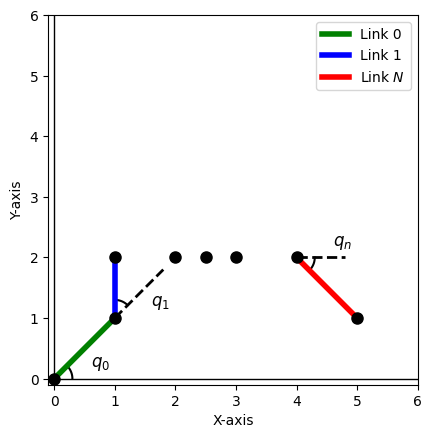

In [174]:
import matplotlib.pyplot as plt
import numpy as np

# Plot settings
plt.axhline(0, color="black", linewidth=1)  # X-axis
plt.axvline(0, color="black", linewidth=1)  # Y-axis
limit = 6
plt.xlim(-0.1, limit)
plt.ylim(-0.1, limit)
plt.gca().set_aspect("equal", adjustable="box")


# Function to plot angles
def plot_angle(x, y, start_angle, end_angle, radius=0.3, label=""):
    # Calculate the angle arc between the two angles
    theta = np.linspace(start_angle, end_angle, 100)
    arc_x = radius * np.cos(theta) + x
    arc_y = radius * np.sin(theta) + y
    plt.plot(arc_x, arc_y, "black")
    plt.text(x + 0.3 + radius, y - 0.1 + radius, label, fontsize=12)


# Plot the angles between the links
plot_angle(0, 0, 0, np.pi / 4, label=r"$q_0$")  # Angle between Link 0 and X-axis
plot_angle(
    1, 1, np.pi / 4, np.pi / 2, label=r"$q_1$"
)  # Angle between Link 1 and dashed line q1
plot_angle(
    4, 2, -np.pi / 4, 0, label=r"$q_n$"
)  # Angle between Link N and dashed line qn

# Plot the links
plt.plot([0, 1], [0, 1], color="green", linewidth=4, label="Link 0")
plt.plot([1, 1], [1, 2], color="blue", linewidth=4, label="Link 1")
plt.plot([4, 5], [2, 1], color="red", linewidth=4, label=r"Link $N$")

# Plot the dashed lines for q1 and qn
plt.plot([1, 1.8], [1, 1.8], "--", color="black", linewidth=2)
plt.plot([4, 4.8], [2, 2], "--", color="black", linewidth=2)

# Plot the joints
plt.plot(0, 0, "-o", color="black", markersize=8, linewidth=4)
plt.plot(1, 1, "-o", color="black", markersize=8, linewidth=4)
plt.plot(1, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(2, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(2.5, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(3, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(4, 2, "-o", color="black", markersize=8, linewidth=4)
plt.plot(5, 1, "-o", color="black", markersize=8, linewidth=4)


# Add a legend in the upper right corner
plt.legend(loc="upper right")

# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show plot
plt.show()

## Naive configuration

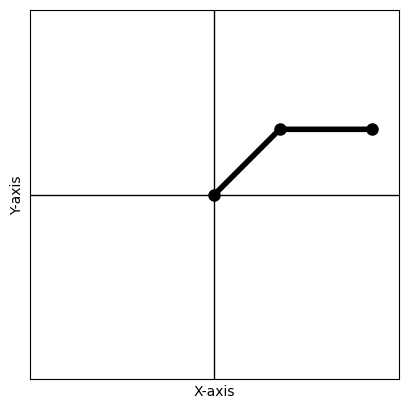

In [36]:
# Example usage of the PlanarRobot class:

# Define joint angles (in radians) and link lengths for two robots
joint_angles = np.radians(
    [
        45,
        -45,
    ]
)  # Robot 1's joint angles
link_lengths = [1.0] * len(joint_angles)  # Robot 1's link lengths

# Create robot instances with different configurations and colors
robot = PlanarRobot(joint_angles, link_lengths, color="black")

# Plot both robots on the same graph with dynamic limits based on their total reach
plot_multiple_planar_robots(robot)

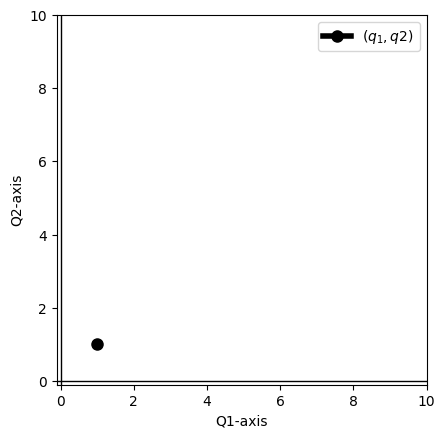

In [16]:
import matplotlib.pyplot as plt

# Plot settings
plt.axhline(0, color="black", linewidth=1)  # X-axis
plt.axvline(0, color="black", linewidth=1)  # Y-axis
limit = 10
plt.xlim(-0.1, limit)
plt.ylim(-0.1, limit)
plt.gca().set_aspect("equal", adjustable="box")

plt.plot(1, 1, "-o", color="black", markersize=8, linewidth=4, label=r"$(q_1,q2)$")

# Add a legend in the upper right corner
plt.legend(loc="upper right")

# Labels and title
plt.xlabel("Q1-axis")
plt.ylabel("Q2-axis")

# Show plot
plt.show()

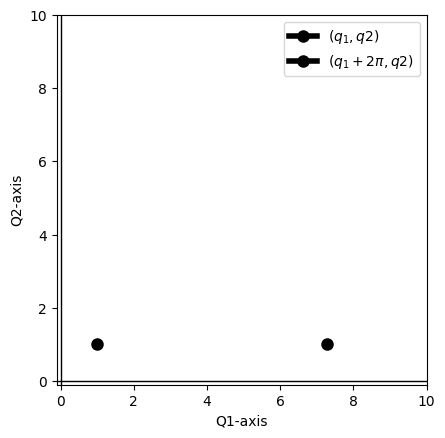

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Plot settings
plt.axhline(0, color="black", linewidth=1)  # X-axis
plt.axvline(0, color="black", linewidth=1)  # Y-axis
limit = 10
plt.xlim(-0.1, limit)
plt.ylim(-0.1, limit)
plt.gca().set_aspect("equal", adjustable="box")

plt.plot(1, 1, "-o", color="black", markersize=8, linewidth=4, label=r"$(q_1,q2)$")
plt.plot(
    1 + 2 * np.pi,
    1,
    "-o",
    color="black",
    markersize=8,
    linewidth=4,
    label=r"$(q_1 + 2\pi,q2)$",
)


# Add a legend in the upper right corner
plt.legend(loc="upper right")

# Labels and title
plt.xlabel("Q1-axis")
plt.ylabel("Q2-axis")

# Show plot
plt.show()

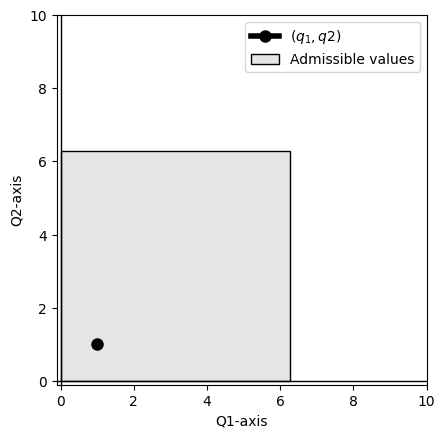

In [43]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# Plot settings
plt.axhline(0, color="black", linewidth=1)  # X-axis
plt.axvline(0, color="black", linewidth=1)  # Y-axis
limit = 10
plt.xlim(-0.1, limit)
plt.ylim(-0.1, limit)
plt.gca().set_aspect("equal", adjustable="box")

plt.plot(1, 1, "-o", color="black", markersize=8, linewidth=4, label=r"$(q_1,q2)$")


plt.gca().add_patch(
    Rectangle(
        (0, 0),
        2 * np.pi,
        2 * np.pi,
        ec=(0, 0, 0, 1),
        fc=(191 / 255, 191 / 255, 191 / 255, 0.4),
        label="Admissible values",
    )
)

# Add a legend in the upper right corner
plt.legend(loc="upper right")

# Labels and title
plt.xlabel("Q1-axis")
plt.ylabel("Q2-axis")

# Show plot
plt.show()

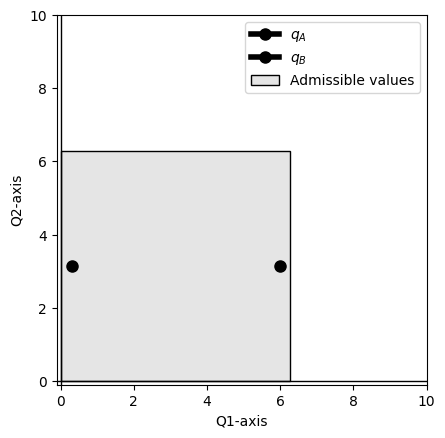

In [48]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# Plot settings
plt.axhline(0, color="black", linewidth=1)  # X-axis
plt.axvline(0, color="black", linewidth=1)  # Y-axis
limit = 10
plt.xlim(-0.1, limit)
plt.ylim(-0.1, limit)
plt.gca().set_aspect("equal", adjustable="box")

epsilon = 0.3
plt.plot(epsilon, np.pi, "-o", color="black", markersize=8, linewidth=4, label=r"$q_A$")
plt.plot(
    2 * np.pi - epsilon,
    np.pi,
    "-o",
    color="black",
    markersize=8,
    linewidth=4,
    label=r"$q_B$",
)


plt.gca().add_patch(
    Rectangle(
        (0, 0),
        2 * np.pi,
        2 * np.pi,
        ec=(0, 0, 0, 1),
        fc=(191 / 255, 191 / 255, 191 / 255, 0.4),
        label="Admissible values",
    )
)

# Add a legend in the upper right corner
plt.legend(loc="upper right")

# Labels and title
plt.xlabel("Q1-axis")
plt.ylabel("Q2-axis")

# Show plot
plt.show()

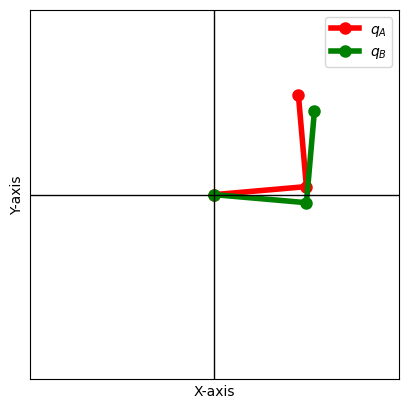

In [39]:
# Define joint angles (in radians) and link lengths for two robots
joint_angles1 = np.radians([5, 90])
link_lengths1 = [1.0] * len(joint_angles1)

joint_angles2 = np.radians([-5, 90])
link_lengths2 = [1.0] * len(joint_angles2)

# Create robot instances with different configurations and colors
robot1 = PlanarRobot(joint_angles1, link_lengths1, color="red", label=r"$q_A$")
robot2 = PlanarRobot(joint_angles2, link_lengths2, color="green", label=r"$q_B$")


# Plot both robots on the same graph with dynamic limits based on their total reach
plot_multiple_planar_robots(robot1, robot2)
plt.legend(loc="upper right")
plt.show()

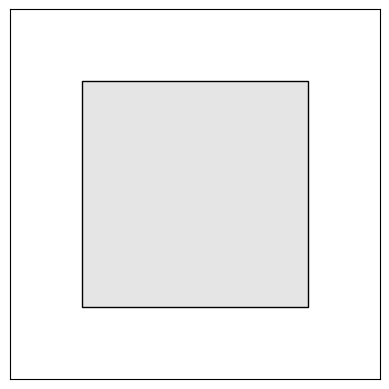

In [78]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

plt.xlim(-2, 2 * np.pi + 2)
plt.ylim(-2, 2 * np.pi + 2)
plt.gca().set_aspect("equal", adjustable="box")


plt.gca().add_patch(
    Rectangle(
        (0, 0),
        2 * np.pi,
        2 * np.pi,
        ec=(0, 0, 0, 1),
        fc=(191 / 255, 191 / 255, 191 / 255, 0.4),
    )
)

plt.xticks([])
plt.yticks([])

# Show plot
plt.show()

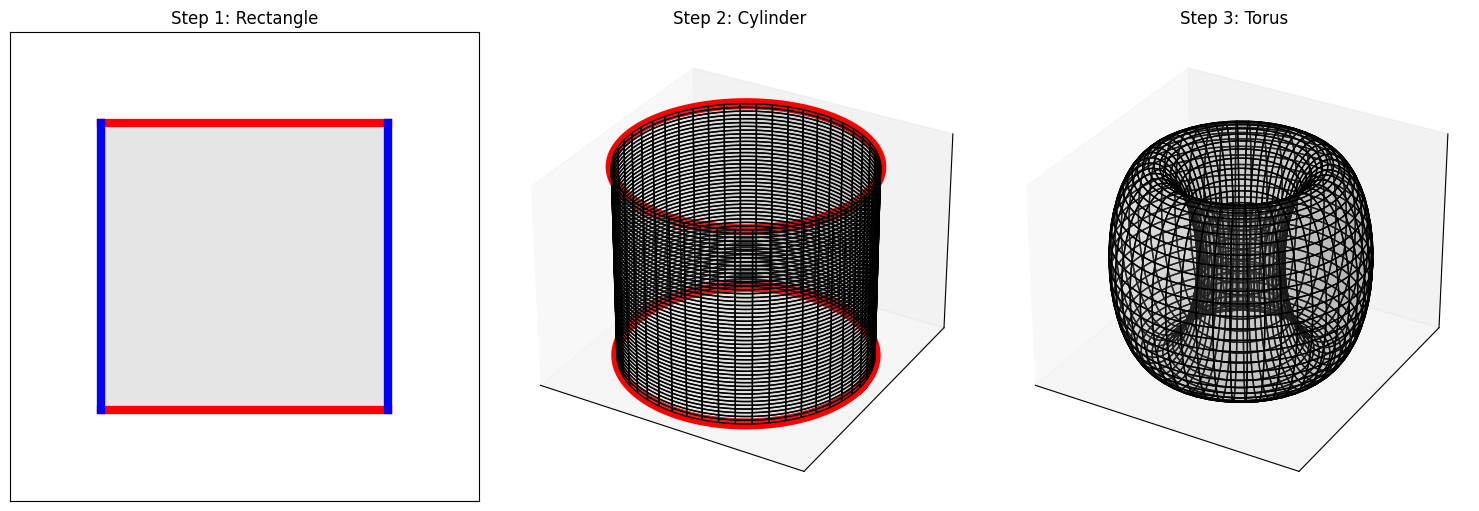

In [130]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create figure
fig = plt.figure(figsize=(15, 5))

# Step 1: 2D Rectangle plot with highlighted boundaries
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_xlim(-2, 2 * np.pi + 2)
ax1.set_ylim(-2, 2 * np.pi + 2)
rect = plt.Rectangle(
    (0, 0),
    2 * np.pi,
    2 * np.pi,
    ec=(0, 0, 0, 1),
    fc=(191 / 255, 191 / 255, 191 / 255, 0.4),
)
ax1.add_patch(rect)
ax1.plot(
    [0, 2 * np.pi], [2 * np.pi, 2 * np.pi], color="red", lw=6, label="Top Boundary"
)  # Thicker
ax1.plot([0, 2 * np.pi], [0, 0], color="red", lw=6, label="Bottom Boundary")  # Thicker
ax1.plot([0, 0], [0, 2 * np.pi], color="blue", lw=6, label="Left Boundary")  # Thicker
ax1.plot(
    [2 * np.pi, 2 * np.pi], [0, 2 * np.pi], color="blue", lw=6, label="Right Boundary"
)  # Thicker
ax1.set_title("Step 1: Rectangle")
ax1.set_aspect("equal", adjustable="box")
ax1.set_xticks([])
ax1.set_yticks([])

# Step 2: 3D Cylinder plot with highlighted extremities
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
theta = np.linspace(0, 2 * np.pi, 1000)
z = np.linspace(0, 2 * np.pi, 1000)
theta, z = np.meshgrid(theta, z)
x = np.cos(theta)
y = np.sin(theta)

# Plot the cylinder with reduced opacity for the mesh
ax2.plot_surface(
    x, y, z, color=(191 / 255, 191 / 255, 191 / 255, 0.2), edgecolor="k", alpha=0.2
)
ax2.plot(
    np.cos(theta[0]), np.sin(theta[0]), z[0], color="red", lw=8, label="Top Circle"
)  # Thicker, highlighted
ax2.plot(
    np.cos(theta[-1]),
    np.sin(theta[-1]),
    z[-1],
    color="red",
    lw=8,
    label="Bottom Circle",
)  # Thicker, highlighted

# # Draw the line connecting the two extremities of the cylinder
# ax2.plot(
#     [-1, -1], [0, 0], [2 * np.pi, 0], color="blue", lw=9, label="Joining Line"
# )  # Draw line instead of markers

ax2.set_title("Step 2: Cylinder")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])

# Step 3: 3D Torus plot with extremities highlighted
ax3 = fig.add_subplot(1, 3, 3, projection="3d")
R = 2  # Major radius
r = 1  # Minor radius

u = np.linspace(0, 2 * np.pi, 1000)
v = np.linspace(0, 2 * np.pi, 1000)
u, v = np.meshgrid(u, v)

x = (R + r * np.cos(v)) * np.cos(u)
y = (R + r * np.cos(v)) * np.sin(u)
z = r * np.sin(v)

# Plot the torus with reduced opacity for the mesh
ax3.plot_surface(
    x, y, z, color=(191 / 255, 191 / 255, 191 / 255, 0.2), edgecolor="k", alpha=0.2
)
# ax3.plot(
#     [R, -R], [0, 0], [0, 0], color="blue", lw=6, label="Joining Line"
# )  # Draw the joining line on the torus

ax3.set_title("Step 3: Torus")
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_zticks([])

# Show plot
plt.tight_layout()
plt.show()

## Distance on a manifold

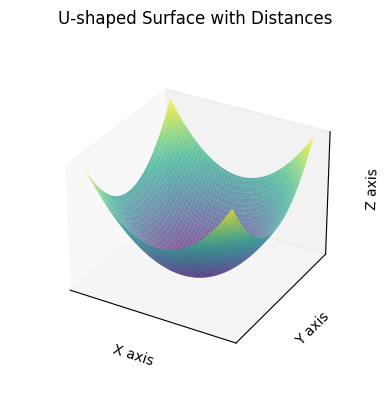

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)

# Define the U-shaped surface (parabolic bowl)
z = x**2 + y**2

# Plotting the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, cmap="viridis", alpha=0.7)

# Labels and title
ax.set_title("U-shaped Surface with Distances")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(aspect=None, zoom=0.8)  # zoom out to show the z label
# Show the plot
plt.show()

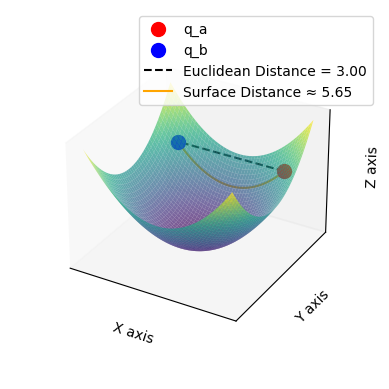

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)

# Define the U-shaped surface (parabolic bowl)
z = x**2 + y**2

# Points q_a and q_b
q_a = np.array([1.5, 1.5])
q_b = np.array([-1.5, 1.5])

# Calculate z values for q_a and q_b
z_a = q_a[0] ** 2 + q_a[1] ** 2
z_b = q_b[0] ** 2 + q_b[1] ** 2

# Euclidean distance between q_a and q_b
euclidean_distance = np.linalg.norm(q_a - q_b)

# Generate intermediate points along the surface between q_a and q_b
n_steps = 100
t_values = np.linspace(0, 1, n_steps)
surface_path_x = (1 - t_values) * q_a[0] + t_values * q_b[0]
surface_path_y = (1 - t_values) * q_a[1] + t_values * q_b[1]
surface_path_z = surface_path_x**2 + surface_path_y**2

# Approximate surface distance by summing distances along the surface
surface_distance = 0
for i in range(1, n_steps):
    point1 = np.array(
        [surface_path_x[i - 1], surface_path_y[i - 1], surface_path_z[i - 1]]
    )
    point2 = np.array([surface_path_x[i], surface_path_y[i], surface_path_z[i]])
    surface_distance += np.linalg.norm(point2 - point1)

# Plotting the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, cmap="viridis", alpha=0.7)

# Plotting points q_a and q_b
ax.scatter(q_a[0], q_a[1], z_a, color="red", s=100, label="q_a")
ax.scatter(q_b[0], q_b[1], z_b, color="blue", s=100, label="q_b")

# Plotting Euclidean distance (straight line)
ax.plot(
    [q_a[0], q_b[0]],
    [q_a[1], q_b[1]],
    [z_a, z_b],
    color="black",
    linestyle="--",
    label=f"Euclidean Distance = {euclidean_distance:.2f}",
)

# Plotting the surface distance (curved line along the surface)
ax.plot(
    surface_path_x,
    surface_path_y,
    surface_path_z,
    color="orange",
    label=f"Surface Distance ≈ {surface_distance:.2f}",
)

# Labels and title
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(aspect=None, zoom=0.8)  # zoom out to show the z label
# Show the plot
# Legend
ax.legend(loc="upper right")

plt.show()

## Displacement metric

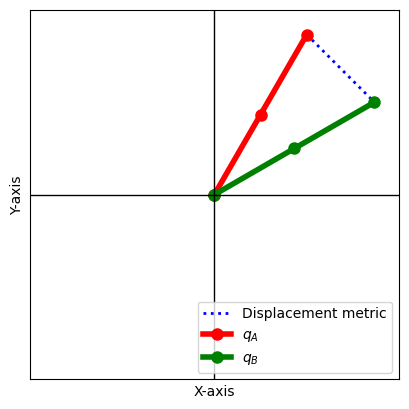

In [44]:
joint_angles1 = np.radians([60, 0])  # Robot 1 angles
link_lengths1 = [1.0] * len(joint_angles1)  # Robot 1 link lengths

joint_angles2 = np.radians([30, 0])  # Robot 2 angles
link_lengths2 = [1.0] * len(joint_angles2)  # Robot 2 link lengths


robot1 = PlanarRobot(joint_angles1, link_lengths1, color="red", label=r"$q_A$")
robot2 = PlanarRobot(joint_angles2, link_lengths2, color="green", label=r"$q_B$")

plt.plot(
    [robot1.points[-1, 0], robot2.points[-1, 0]],  # x coordinates of end effectors
    [robot1.points[-1, 1], robot2.points[-1, 1]],  # y coordinates of end effectors
    color="blue",  # Line color
    linestyle=":",  # Dotted line style
    linewidth=2,  # Line width
    label="Displacement metric",
)
plot_multiple_planar_robots(robot1, robot2)


plt.legend(loc="lower right")
plt.show()

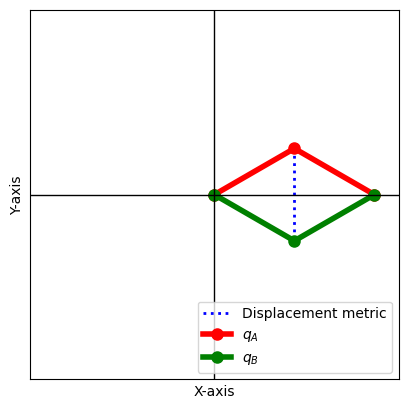

In [47]:
joint_angles1 = np.radians([30, -60])  # Robot 1 angles
link_lengths1 = [1.0] * len(joint_angles1)  # Robot 1 link lengths

joint_angles2 = np.radians([-30, 60])  # Robot 2 angles
link_lengths2 = [1.0] * len(joint_angles2)  # Robot 2 link lengths


robot1 = PlanarRobot(joint_angles1, link_lengths1, color="red", label=r"$q_A$")
robot2 = PlanarRobot(joint_angles2, link_lengths2, color="green", label=r"$q_B$")

plt.plot(
    [robot1.points[-2, 0], robot2.points[-2, 0]],  # x coordinates of end effectors
    [robot1.points[-2, 1], robot2.points[-2, 1]],  # y coordinates of end effectors
    color="blue",  # Line color
    linestyle=":",  # Dotted line style
    linewidth=2,  # Line width
    label="Displacement metric",
)
plot_multiple_planar_robots(robot1, robot2)


plt.legend(loc="lower right")
plt.show()

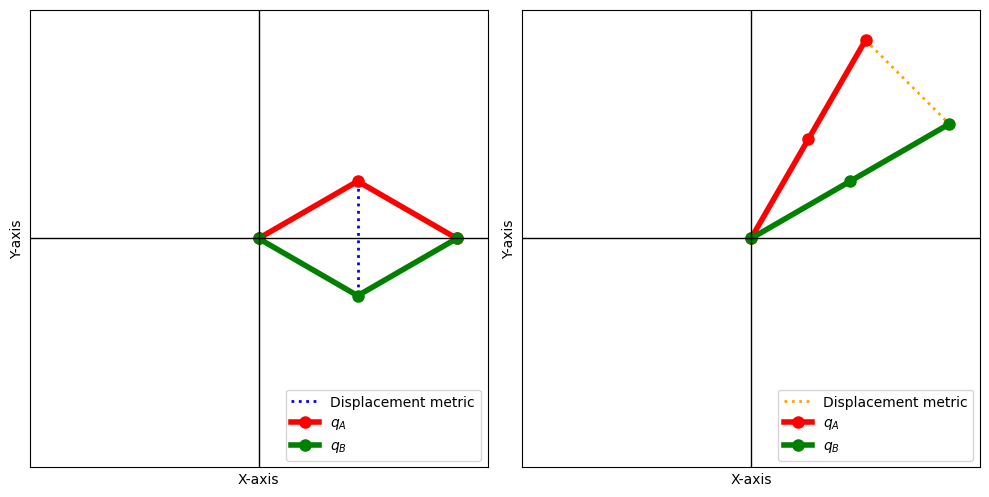

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First set of joint angles and link lengths
joint_angles1 = np.radians([30, -60])  # Robot 1 angles (first plot)
link_lengths1 = [1.0] * len(joint_angles1)  # Robot 1 link lengths (first plot)

joint_angles2 = np.radians([-30, 60])  # Robot 2 angles (first plot)
link_lengths2 = [1.0] * len(joint_angles2)  # Robot 2 link lengths (first plot)

# Second set of joint angles and link lengths
joint_angles3 = np.radians([60, 0])  # Robot 1 angles (second plot)
link_lengths3 = [1.0] * len(joint_angles3)  # Robot 1 link lengths (second plot)

joint_angles4 = np.radians([30, 0])  # Robot 2 angles (second plot)
link_lengths4 = [1.0] * len(joint_angles4)  # Robot 2 link lengths (second plot)

# Create robot instances for both sets of configurations
robot1 = PlanarRobot(joint_angles1, link_lengths1, color="red", label=r"$q_A$")
robot2 = PlanarRobot(joint_angles2, link_lengths2, color="green", label=r"$q_B$")
robot3 = PlanarRobot(joint_angles3, link_lengths3, color="red", label=r"$q_A$")
robot4 = PlanarRobot(joint_angles4, link_lengths4, color="green", label=r"$q_B$")

# First subplot (first set of robots)
plt.sca(ax1)  # Set current axis to the first subplot

ax1.plot(
    [robot1.points[-2, 0], robot2.points[-2, 0]],  # x coordinates (set 1)
    [robot1.points[-2, 1], robot2.points[-2, 1]],  # y coordinates (set 1)
    color="blue",  # Line color
    linestyle=":",  # Dotted line style
    linewidth=2,  # Line width
    label="Displacement metric",
)
plot_multiple_planar_robots(robot1, robot2)  # Plot the first set
ax1.legend(loc="lower right")

# Second subplot (second set of robots)
plt.sca(ax2)  # Set current axis to the second subplot

ax2.plot(
    [robot3.points[-1, 0], robot4.points[-1, 0]],  # x coordinates (set 2)
    [robot3.points[-1, 1], robot4.points[-1, 1]],  # y coordinates (set 2)
    color="orange",  # Line color
    linestyle=":",  # Dotted line style
    linewidth=2,  # Line width
    label="Displacement metric",
)
plot_multiple_planar_robots(robot3, robot4)  # Plot the second set
ax2.legend(loc="lower right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()